**Previsão de Risco de Diabetes Tipo 2 a partir de Dados Clínicos**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 2. Carregamento dos dados
df = pd.read_csv("diabetes.csv")
print("Dimensão do dataset:", df.shape)
df.head()

Dimensão do dataset: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# 3. Inspeção inicial
print(df.info())
print(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
Bloo

Distribuição do Target:
 Outcome
0    500
1    268
Name: count, dtype: int64


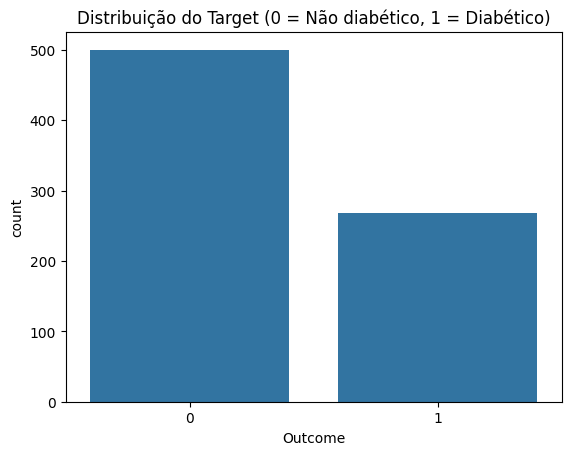

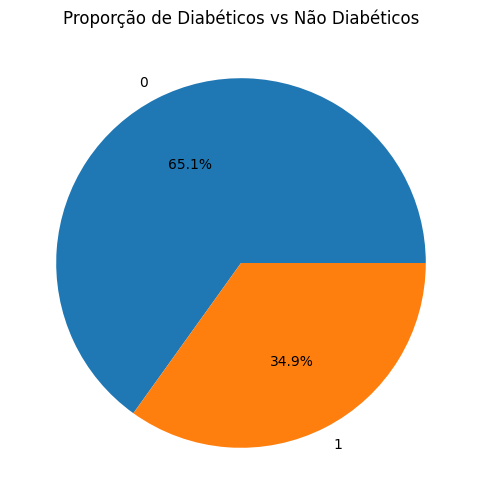

In [5]:
# 4. Análise do target (Outcome)
outcome_counts = df["Outcome"].value_counts()
print("Distribuição do Target:\n", outcome_counts)
# Gráfico de barras
sns.countplot(x="Outcome", data=df)
plt.title("Distribuição do Target (0 = Não diabético, 1 = Diabético)")
plt.show()
# Pie chart
outcome_counts.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6), title="Proporção de Diabéticos vs Não Diabéticos")
plt.ylabel("")
plt.show()

In [6]:
# 5. Tratamento de dados inválidos
# Colunas onde zero não faz sentido
to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[to_replace] = df[to_replace].replace(0, np.nan)
# Checar valores ausentes
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


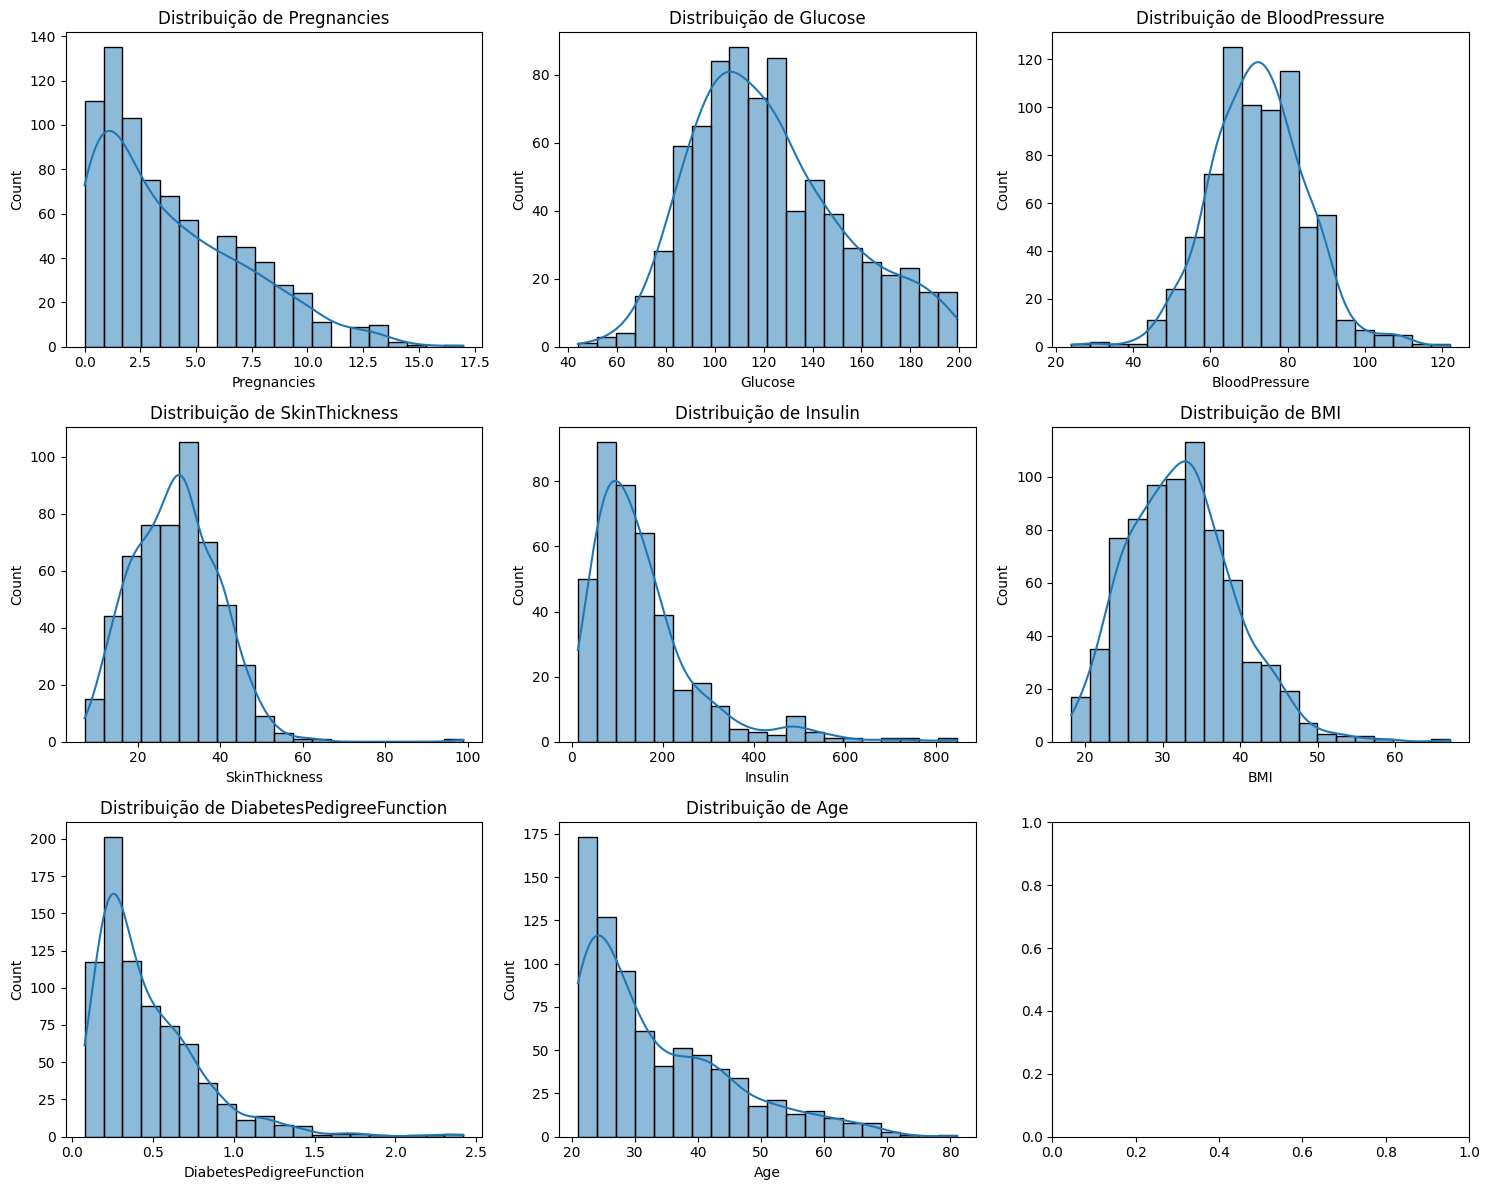

In [7]:
# 6. Análise univariada
# Histogramas
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()
for i, col in enumerate(df.columns[:-1]):  # ignorar Outcome
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribuição de {col}")
plt.tight_layout()
plt.show()

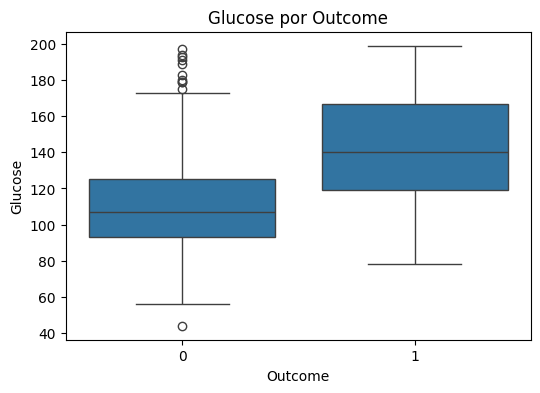

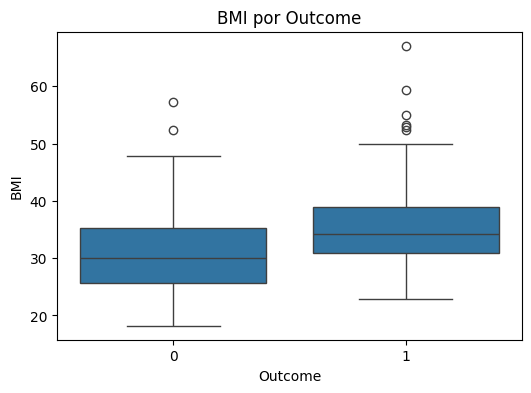

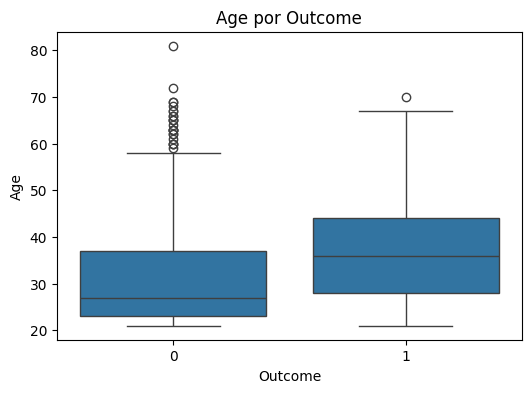

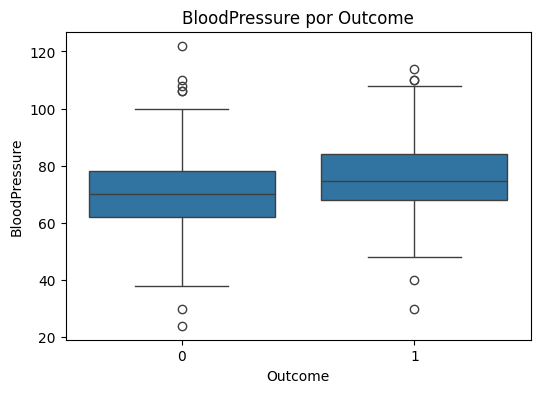

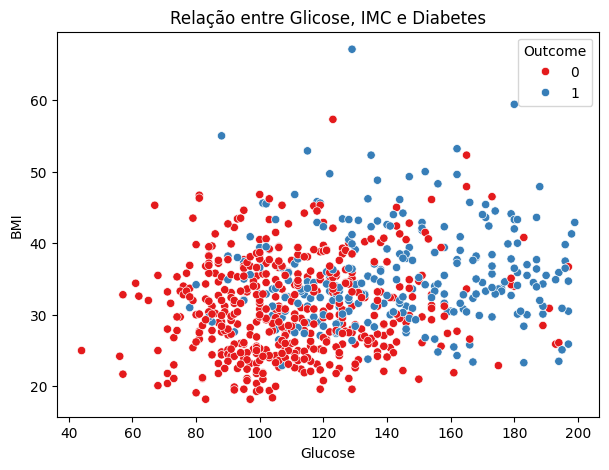

In [8]:
# 7. Análise bivariada
# Boxplots de variáveis clínicas vs Outcome
for col in ["Glucose", "BMI", "Age", "BloodPressure"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Outcome", y=col, data=df)
    plt.title(f"{col} por Outcome")
    plt.show()
# Scatterplot IMC vs Glicose
plt.figure(figsize=(7,5))
sns.scatterplot(x="Glucose", y="BMI", hue="Outcome", data=df, palette="Set1")
plt.title("Relação entre Glicose, IMC e Diabetes")
plt.show()

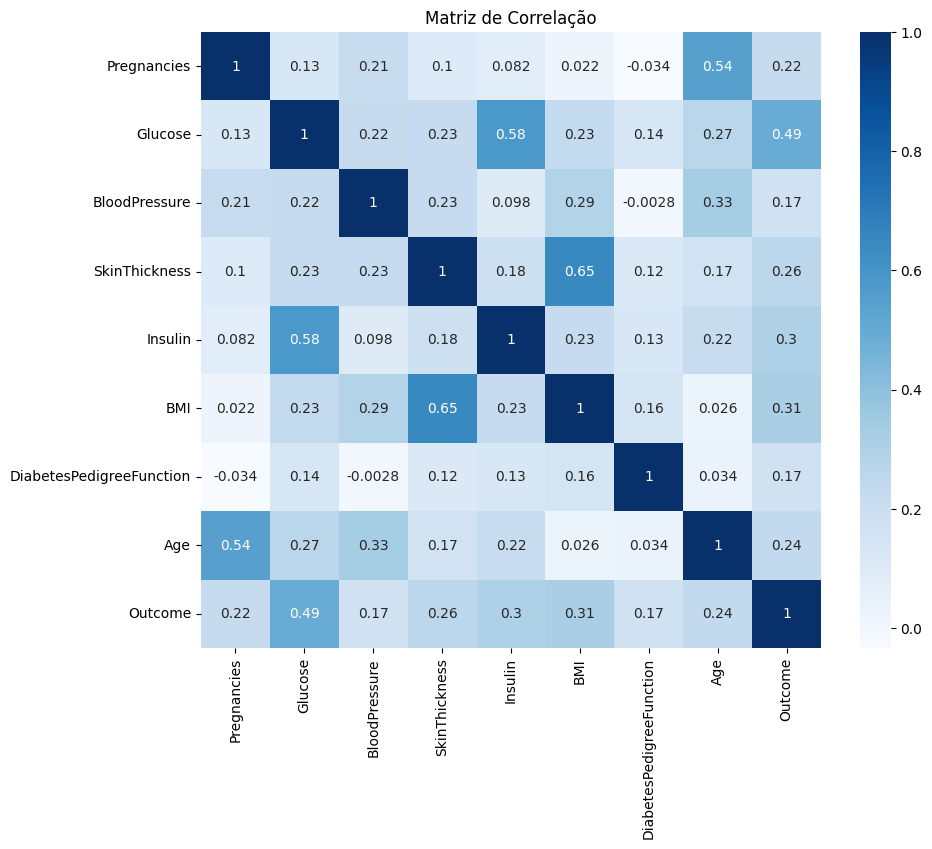

In [9]:
# 8. Correlação entre variáveis
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Matriz de Correlação")
plt.show()

In [10]:
# 9. Engenharia de variáveis
# Faixas etárias
df["AgeGroup"] = pd.cut(df["Age"], bins=[20,30,40,50,60,70,80], labels=["20-29","30-39","40-49","50-59","60-69","70+"])
# Categorias de IMC
def bmi_category(bmi):
    if bmi < 18.5:
        return "Abaixo do peso"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Sobrepeso"
    else:
        return "Obeso"
df["BMICategory"] = df["BMI"].apply(lambda x: bmi_category(x) if pd.notnull(x) else np.nan)
# Prevalência por faixa etária
print(df.groupby("AgeGroup")["Outcome"].mean())
# Prevalência por categoria de IMC
print(df.groupby("BMICategory")["Outcome"].mean())

AgeGroup
20-29    0.215827
30-39    0.484076
40-49    0.566372
50-59    0.574074
60-69    0.280000
70+      0.000000
Name: Outcome, dtype: float64
BMICategory
Abaixo do peso    0.000000
Normal            0.068627
Obeso             0.463983
Sobrepeso         0.223464
Name: Outcome, dtype: float64


In [11]:
# 10. Exportar dataset tratado
df.to_csv("pima_clean.csv", index=False)
print("Dataset tratado exportado para pima_clean.csv")

Dataset tratado exportado para pima_clean.csv
